**Table of contents**<a id='toc0_'></a>    
- [简介](#toc1_)    
- [核心组件](#toc2_)    
- [工作原理](#toc3_)    
- [启动`CDP`服务器](#toc4_)    
- [客户端实现](#toc5_)    
- [示例](#toc6_)    
  - [监听网络请求](#toc6_1_)    
- [参考](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[简介](#toc0_)

[CDP(Chrome DevTools Protocol)](https://chromedevtools.github.io/devtools-protocol/)是Chrome浏览器提供的一套调试协议,通过该协议允许客户端对`Chromium`、`Chrome`和其他基于 `Blink`的浏览器进行检测、检查、调试和分析

# <a id='toc2_'></a>[核心组件](#toc0_)

**`方法(Methods)`**

也叫`命令(Command)`,用于执行特定的操作，如获取元素、获取页面信息等

**`事件(Events)`**

浏览器触发的事件通知

**`类型(Types)`**

用于描述数据结构

**`域(Domains)`**

对方法、事件和类型进行分组，如`Page`、`Runtime`等

# <a id='toc3_'></a>[工作原理](#toc0_)

`CDP`通过`WebSocket`在客户端和服务端之间进行通信,所有消息都是遵循[JSON-RPC 2.0](https://www.jsonrpc.org/specification)规范的`JSON`格式,消息分为以下两种:

- `命令(Command)`: 由客户端发送,例如加载页面、获取元素等
- `事件(Event)`: 由服务端发送,例如页面加载完成、元素被点击等

# <a id='toc4_'></a>[启动`CDP`服务器](#toc0_)

要使用`CDP`和浏览器进行交互,首先需要启动一个`CDP`服务器,它监听某个端口,然后接收来自客户端的`CDP`请求来实现与浏览器的交互


**1. Windows Chrome**

在`Windows`上通过`WIN+R`运行以下命令来启动`Chrome`浏览器并开启`CDP`服务器

```cmd
chrome --remote-debugging-port=9222 --user-data-dir="C:\Users\markw\AppData\Local\Google\Chrome\User Data\Default\TestUser"
```

# <a id='toc5_'></a>[客户端实现](#toc0_)

客户端用来根据用户的需求发送对应的`CDP`请求到服务器来完成特定的操作,最常见的客户端是`Chrome DevTools`工具

要通过程序来发送`CDP`请求,则可以使用[Playwright](https://playwright.dev/python/)或者[Selenium](https://www.selenium.dev/zh-cn/documentation/)这类的自动化测试工具,它们都提供了对`CDP`的支持

# <a id='toc6_'></a>[示例](#toc0_)

## <a id='toc6_1_'></a>[监听网络请求](#toc0_)

Request URL: https://baidu.com/
Request Method: GET
--------------------
Request URL: https://www.baidu.com/
Request Method: GET
--------------------
Response URL: https://www.baidu.com/
Response Status: 200
--------------------
Request URL: https://pss.bdstatic.com/r/www/static/font/cosmic/pc/cos-icon_99f656e.css
Request Method: GET
--------------------
Request URL: https://pss.bdstatic.com/static/superman/img/topnav/newfanyi-da0cea8f7e.png
Request Method: GET
--------------------
Request URL: https://pss.bdstatic.com/static/superman/img/topnav/newxueshuicon-a5314d5c83.png
Request Method: GET
--------------------
Request URL: https://pss.bdstatic.com/static/superman/img/topnav/newbaike-889054f349.png
Request Method: GET
--------------------
Request URL: https://pss.bdstatic.com/static/superman/img/topnav/newzhidao-da1cf444b0.png
Request Method: GET
--------------------
Request URL: https://pss.bdstatic.com/static/superman/img/topnav/newjiankang-f03b804b4b.png
Request Method: GET
-----
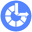
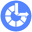

CancelledError: 

In [3]:
import asyncio
from playwright.async_api import async_playwright

def handle_request(request):
    print(f"Request URL: {request['request']['url']}")
    print(f"Request Method: {request['request']['method']}")
    print("--------------------")

def handle_response(response):
    print(f"Response URL: {response['response']['url']}")
    print(f"Response Status: {response['response']['status']}")
    print("--------------------")   

async def main():
    async with async_playwright() as playwright:
        # 通过CDP连接到已经打开的浏览器
        browser =await playwright.chromium.connect_over_cdp("http://localhost:9222")
        default_context = browser.contexts[0]
        page = default_context.pages[0]

        # 创建一个新的CDP会话
        session =await page.context.new_cdp_session(page)

        # 启用Network域 https://chromedevtools.github.io/devtools-protocol/tot/Network/#method-enable
        await session.send("Network.enable")
        # 注册事件处理程序 
        session.on("Network.requestWillBeSent", handle_request)#请求被发送前通知客户端 https://chromedevtools.github.io/devtools-protocol/tot/Network/#event-requestWillBeSent
        session.on("Network.responseReceived", handle_response)#收到响应时通知客户端 https://chromedevtools.github.io/devtools-protocol/tot/Network/#event-responseReceived

        # 导航到页面
        await page.goto("https://baidu.com")

        await page.wait_for_event("close",timeout=0)

await main()

# <a id='toc7_'></a>[参考](#toc0_)

* [介绍下Chrome DevTools Protocol](https://poe.com/s/aT4LsKJRMi7AiekLz0BR)